# Import Scikit-Learn, Pandas and Numpy

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LinearRegression, BayesianRidge, LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor

from scipy.stats import norm, skew

# 1. Import Training Data and Testing using Pandas

In [2]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

In [3]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# 2. Exploratory Data Analysis

### Explore missing data

In [5]:
train_nulls = (train.isnull().sum() / len(train)) * 100
train_nulls = train_nulls[train_nulls > 0]
missing_data_train = pd.DataFrame({'Missing Ratio %' :train_nulls}).sort_values(
    'Missing Ratio %', ascending=False)
missing_data_train

,Missing Ratio %
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945
GarageQual,5.547945


In [6]:
test_nulls = (test.isnull().sum() / len(train)) * 100
test_nulls = test_nulls[test_nulls > 0]
missing_data_test = pd.DataFrame({'Missing Ratio %' :test_nulls}).sort_values(
    'Missing Ratio %', ascending=False)
missing_data_test

,Missing Ratio %
PoolQC,99.726027
MiscFeature,96.438356
Alley,92.602740
Fence,80.068493
FireplaceQu,50.000000
LotFrontage,15.547945
GarageCond,5.342466
GarageYrBlt,5.342466
GarageQual,5.342466
GarageFinish,5.342466


Text(0.5, 1.0, 'Percent missing data by feature')

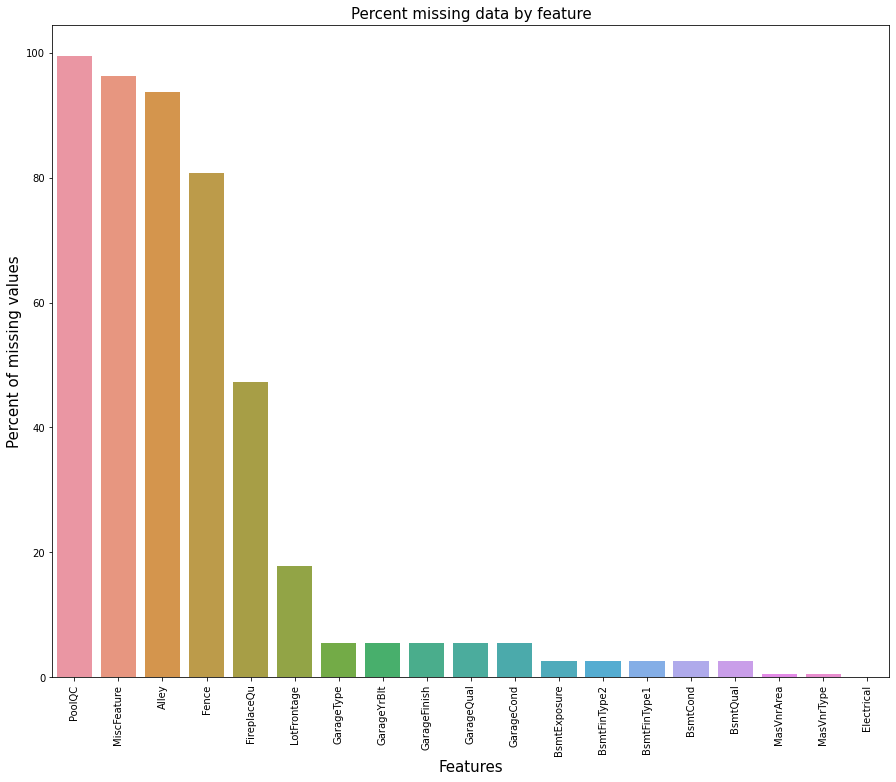

In [7]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=missing_data_train.index, y=missing_data_train['Missing Ratio %'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

Text(0.5, 1.0, 'Percent missing data by feature')

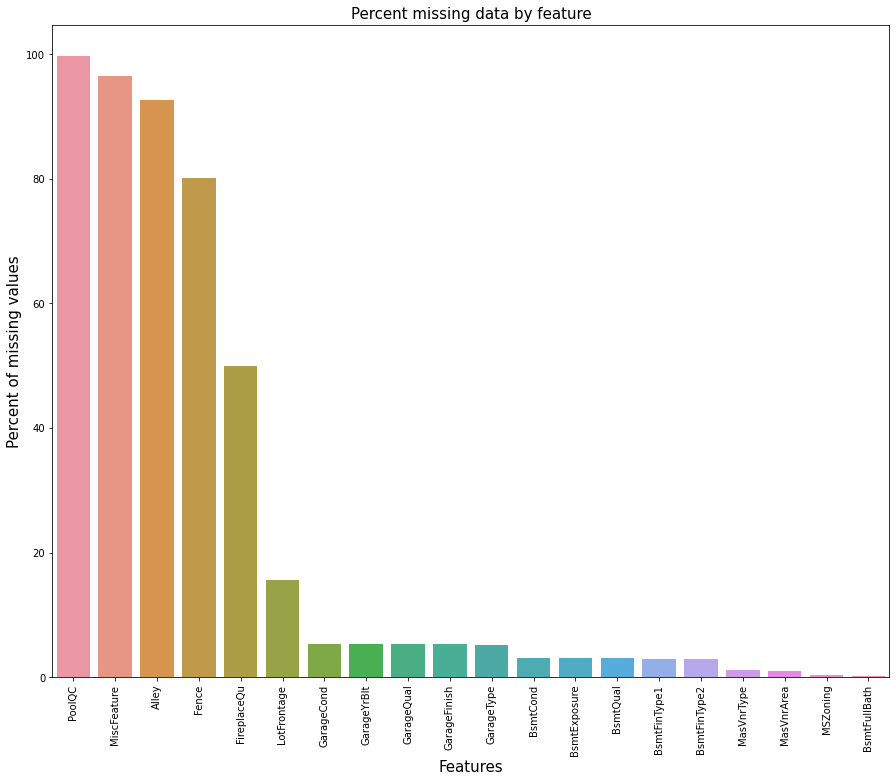

In [8]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=missing_data_test.index[0:20], y=missing_data_test['Missing Ratio %'][0:20])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

### Explore numeric features' statistics

In [11]:
# Discarding Id as it's not an important feature
train.drop("Id", axis = 1, inplace = True)

train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Explore features' distributions

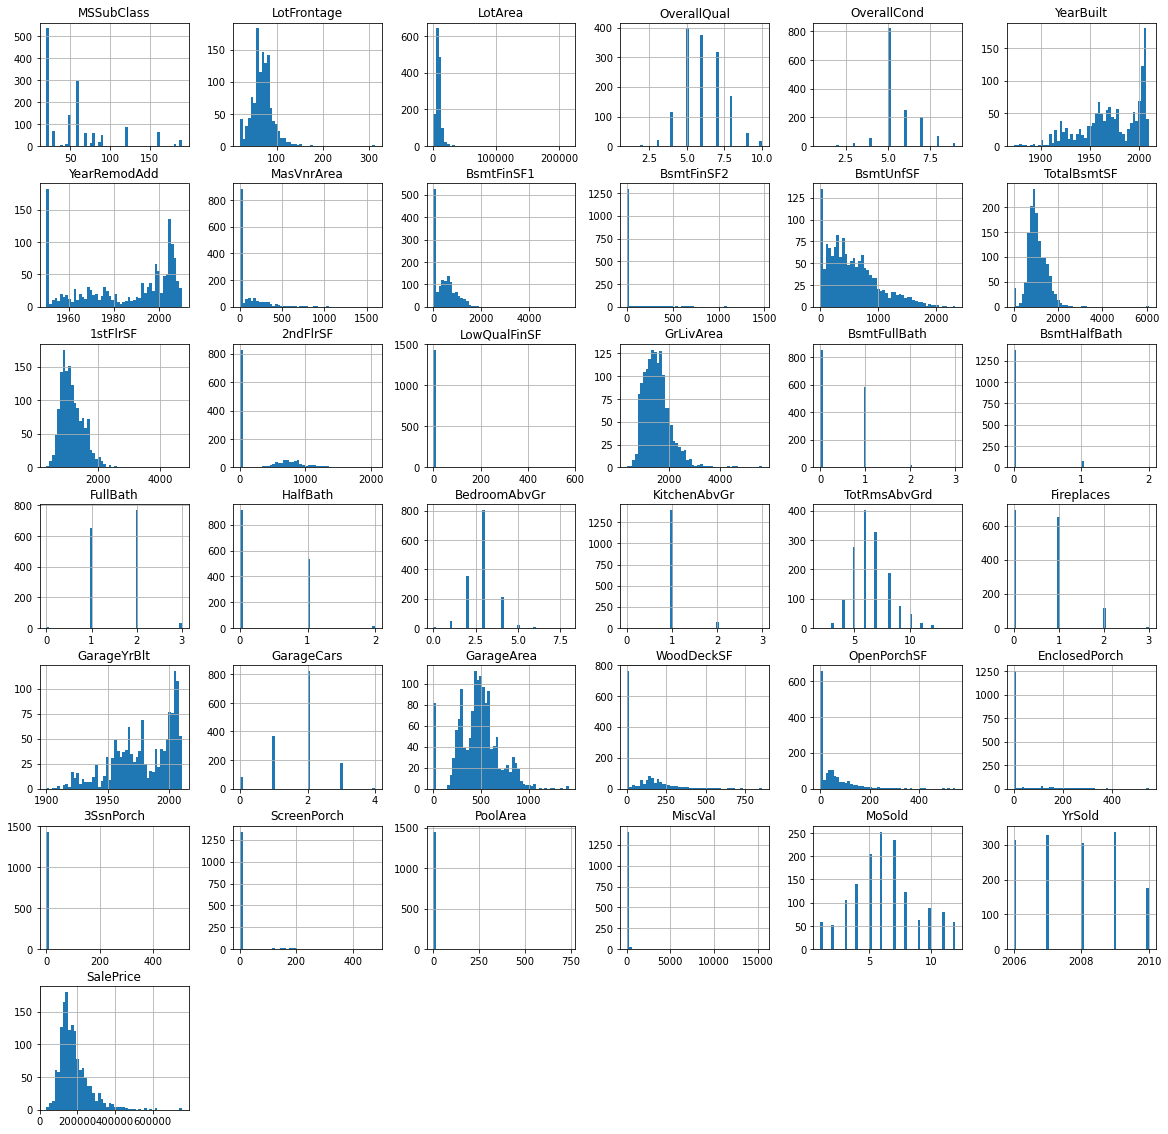

In [12]:
train.hist(bins=50, figsize=(20,20))
plt.show()

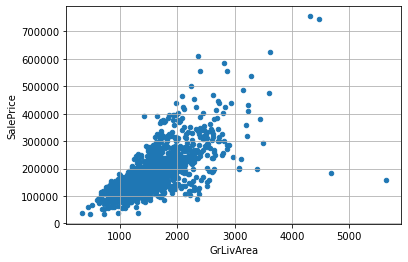

In [13]:
fig = train.plot(kind="scatter", x='GrLivArea', y='SalePrice', grid=True)

### Analyzing target variable

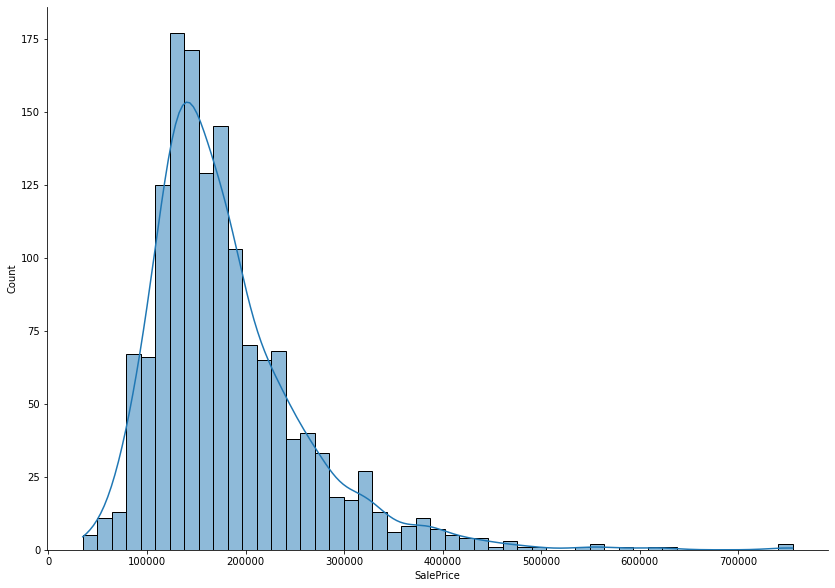

In [14]:
sns.displot(train['SalePrice'] , kde=True, height=8.27, aspect=11.7/8.27)

### Exploring dataset correlation

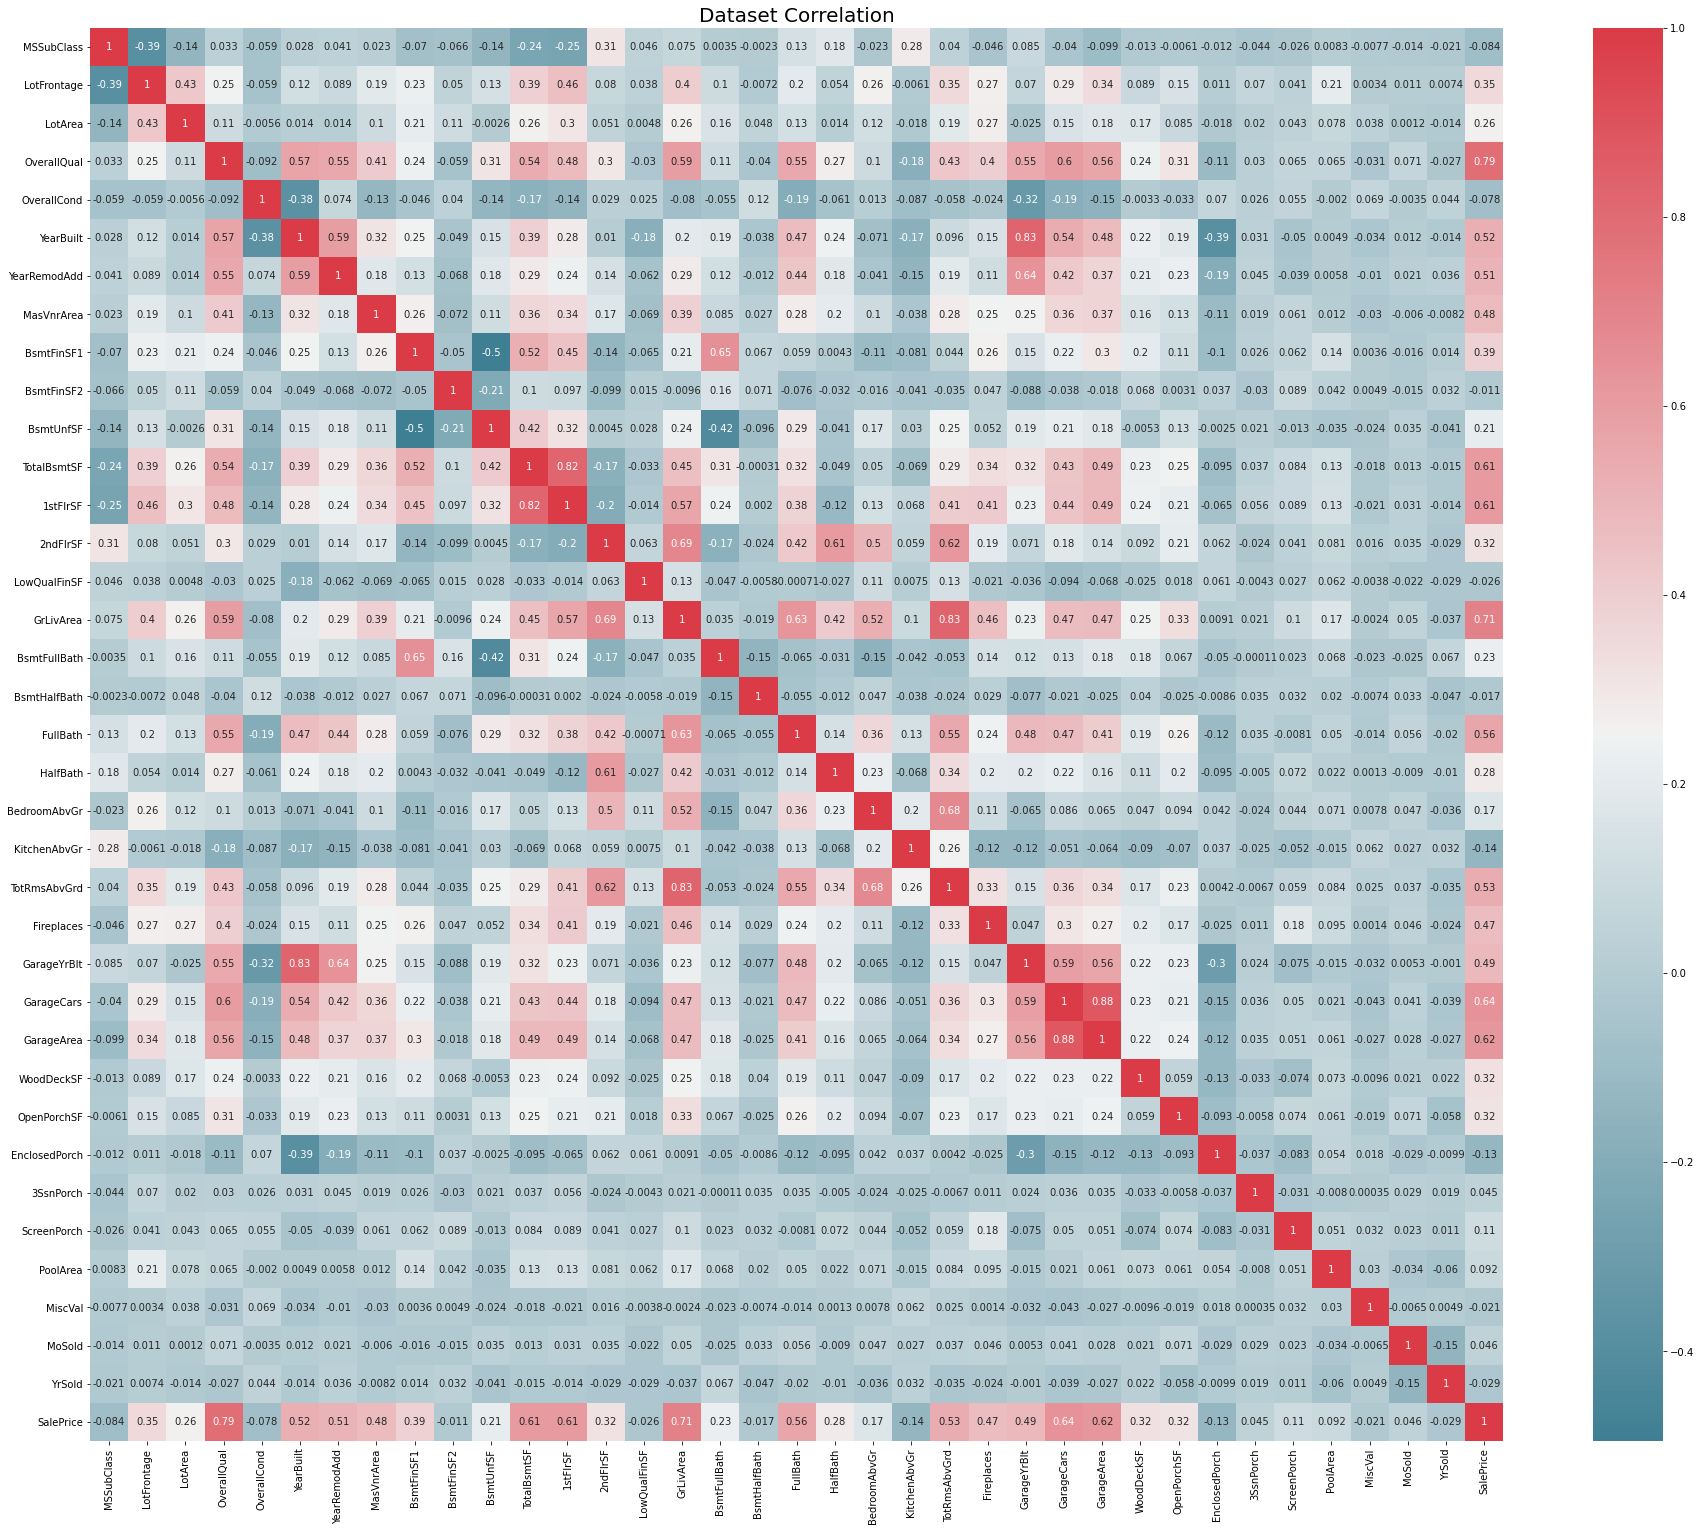

In [15]:
def heat_map_plot(df):
    f, ax = plt.subplots(figsize=(32, 26))
    corr = df.corr()
    mp = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool),\
                     cmap=sns.diverging_palette(220, 10, as_cmap=True),
                     square=True, ax=ax, annot = True)
    mp.set_title(label='Dataset Correlation', fontsize=20)

heat_map_plot(train)

# 3. Data Preprocessing

### Extract numerical and categorical features (nominal and ordinal)

In [16]:
numerical_features = [x for x in train._get_numeric_data().columns if x not in ['SalePrice']]

categorical_features = train.select_dtypes(include=['object']).columns.tolist()
ordinal_features = ['MSZoning', 'Street', 'Alley', 'Utilities', 'OverallQual', 'OverallCond', 'YearBuilt',\
                    'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',\
                    'BsmtFinType2', 'Heating', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType',\
                    'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',\
                    'SaleType', 'SaleCondition']
nominal_features = [x for x in categorical_features if x not in ordinal_features]

label = ['SalePrice']

### Impute missing numeric float data

In [17]:
# Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
test["LotFrontage"] = test.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# Impute GarageYrBlt Nan by zero as it indicates there is no Garage
train["GarageYrBlt"] = train["GarageYrBlt"].transform(lambda x: x.fillna(0))
test["GarageYrBlt"] = test["GarageYrBlt"].transform(lambda x: x.fillna(0))

# Impute MasVnrArea Nan by zero as it indicates there is no Masonary
train["MasVnrArea"] = train["MasVnrArea"].transform(lambda x: x.fillna(0))
test["MasVnrArea"] = test["MasVnrArea"].transform(lambda x: x.fillna(0))

In [18]:
for column in numerical_features:
    train[column] = train[column].transform(lambda x: x.fillna(0))
    test[column] = test[column].transform(lambda x: x.fillna(0))

### Impute missing object data

In [19]:
# Impute Object Nan by None as it indicates there is no that Object
train = train.transform(lambda x: x.fillna('None'))
test = test.transform(lambda x: x.fillna('None'))

In [20]:
train_nulls = (train.isnull().sum() / len(train)) * 100
missing_data_train = pd.DataFrame({'Missing Ratio %' :train_nulls}).sort_values(
    'Missing Ratio %', ascending=False)

test_nulls = (test.isnull().sum() / len(train)) * 100
missing_data_test = pd.DataFrame({'Missing Ratio %' :test_nulls}).sort_values(
    'Missing Ratio %', ascending=False)

In [21]:
missing_data_train.head(5)

,Missing Ratio %
MSSubClass,0.0
MSZoning,0.0
GarageYrBlt,0.0
GarageType,0.0
FireplaceQu,0.0


In [22]:
missing_data_test.head(5)

,Missing Ratio %
Id,0.0
MSSubClass,0.0
GarageType,0.0
FireplaceQu,0.0
Fireplaces,0.0


### Encoding ordinal features

In [23]:
def ordinal_feature_encoding(feature, train, test):
    new_train = train.copy()
    new_test = test.copy()
    ordinal = OrdinalEncoder(handle_unknown = 'ignore')
    ordinal.fit(pd.DataFrame(train[feature]))
    new_train[feature] = ordinal.transform(pd.DataFrame(new_train[feature]))
    new_test[feature] = ordinal.transform(pd.DataFrame(new_test[feature]))
    return new_train, new_test

In [24]:
for feature in ordinal_features:
    train, test = ordinal_feature_encoding(feature, train, test)

### Encoding nominal features

In [25]:
def nominal_feature_encoding(feature, train, test):
    new_train = train.copy()
    new_train = test.copy()
    nominal = OneHotEncoder(handle_unknown = 'ignore')
    nominal.fit(pd.DataFrame(train[feature]))
    nominal_cols_train = nominal.transform(pd.DataFrame(train[feature]))
    nominal_cols_test = nominal.transform(pd.DataFrame(test[feature]))
    column_names = nominal.categories_[0].tolist()
    column_names = [feature+'_'+x for x in column_names]
    new_train = train.join(pd.DataFrame(nominal_cols_train.toarray(), columns=column_names))
    new_train = new_train.drop(columns=[feature])
    new_test = test.join(pd.DataFrame(nominal_cols_test.toarray(), columns=column_names))
    new_test = new_test.drop(columns=[feature])
    return new_train, new_test

In [26]:
for feature in nominal_features:
    train, test = nominal_feature_encoding(feature, train, test)

# 4. Train-Validation split

In [27]:
train_df, val_df = train_test_split(train, test_size=0.1, random_state=42)

X_train = train_df.drop(columns=label)
y_train = train_df[label]

X_val = val_df.drop(columns=label[0])
y_val = val_df[label]

X_test = test.drop(columns=['Id'])

features = [X_train.columns]

### Principal component analysis

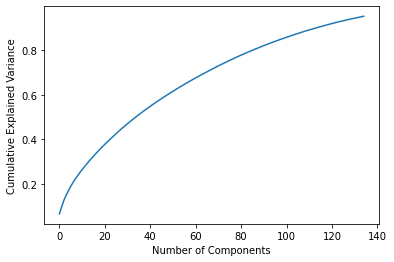

In [28]:
x = StandardScaler().fit_transform(X_train)
pca = PCA(0.95).fit(x)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
fig = plt.plot(np.cumsum(pca.explained_variance_ratio_))

# 5. Modelling

In [39]:
model = Pipeline(
    steps=[
        ('Standard_Scalar', StandardScaler()),
        #('PCA', PCA(n_components=0.95)),
        ('Regressor', GradientBoostingRegressor(
            n_estimators=1000, learning_rate=0.02, max_depth=5, loss='ls', subsample=0.6)
        )
    ])


In [40]:
model.fit(X_train, np.ravel(y_train))

set_config(display='diagram')
model

Pipeline(steps=[('Standard_Scalar', StandardScaler()),
                ('Regressor',
                 GradientBoostingRegressor(learning_rate=0.02, max_depth=5,
                                           n_estimators=1000, subsample=0.6))])

In [41]:
def pipeline_prediction_plot(feature, label, pipeline):    
    # Use the fitted pipeline to make predictions on the train dataset
    train_predictions = pipeline.predict(X_train)

    # Use the fitted pipeline to make predictions on the test dataset
    test_predictions = pipeline.predict(X_val)

    sns.regplot(x=y_train, y=train_predictions, scatter_kws={'alpha':1, 'color':'brown'})
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title("Training Set")
    plt.show()

    sns.regplot(x=y_val, y=test_predictions, scatter_kws={'alpha':1, 'color':'r'})
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title("Test Set")
    plt.show()
    
    housing_predictions = pipeline.predict(X_val)
    lin_rmse = r2_score(y_val, housing_predictions)
    print("r2_score = ", lin_rmse)

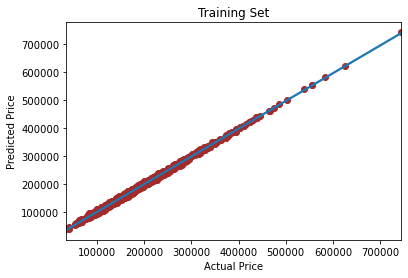

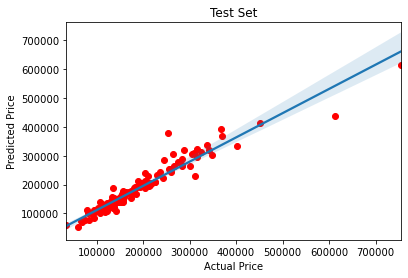

r2_score =  0.9183506155436277


In [42]:
pipeline_prediction_plot(features, label, model)

# 5. Submission

In [43]:
sub = pd.DataFrame()
sub['Id'] = test['Id']
sub['SalePrice'] = model.predict(X_test)
sub.to_csv('Data/submission.csv', index=False)